# Ambiental Radioactivity by M. Green - Chain 228Th
In this notebook, we analyse the events contained in the root file by Matt Green about ambiental radioactivity of Thorium. He said that they simulated the full **232Th-chain**.

## File: `A228_Z90` (*i.e Thorium's decay chain*)
Explaination of the name: A=228, Z=90 is **228Th**, an isotope of Thorium. 
The name suggests to contain the simulation of the full 228Th-chain.

**Questions**:
1. Matt Green said to have simulated the full 232Th-chain. However this file concerns 228Th. *File error?*

In [1]:
import pandas as pd
import os

# Since input file is large, we have to distribute the workload
filepath1 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part1.csv")
filepath2 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part2.csv")
filepath3 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part3.csv")
filepath4 = os.path.join("..", "Data", "output_AmbRad_A228_Z90_100000_part4.csv")
# create multiple dataframes
df1 = pd.read_csv(filepath1, index_col=False)
df2 = pd.read_csv(filepath2, index_col=False)
df3 = pd.read_csv(filepath3, index_col=False)
df4 = pd.read_csv(filepath4, index_col=False)
# concatenate the dfs in a single one and force the mem release
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
del df1
del df2
del df3
del df4

## Atoms involved in this simulation.

In [2]:
print(sorted(df.PID.unique()))

[-11, 11, 22, 1000020040, 1000180360, 1000180380, 1000180400, 1000320740, 1000320760, 1000902280]


These are:
- `PID=-11` positrons
- `PID=11` electrons
- `PID=22` photons
- `PID=1000020040` Helium isotope 4He
- `PID=1000180360` Argon isotope 36Ar
- `PID=1000180380` Argon isotope 38Ar
- `PID=1000180400` Argon isotope 40Ar
- `PID=1000320740` Germanium isotope 74Ge
- `PID=1000320760` Germanium isotope 76Ge
- `PID=1000902280` Thorium isotope 228Th

**Questions**:
1. Even considering 228Th-chain, there are no the elements involed in 228Th-chain (*e.g. Ra, Rn, Po, Pb, ...*)? *Output scheme?*

## Energy depositions
**Note** that since (*probably*) there are cuts on particles, the energy deposition in the next analysis is only a partial description of the real energy deposition.

In [3]:
edep_entries = df[df.energydeposition>0].energydeposition.reset_index()
edep_gby_event = df.groupby("eventnumber").energydeposition.sum().reset_index()
edep_gby_event.columns = ['eventnumber', 'cum_edep']    # to distinguish

pd.DataFrame([edep_entries.energydeposition.describe(), edep_gby_event.cum_edep.describe()])

,count,mean,std,min,25%,50%,75%,max
energydeposition,10066481.0,0.033609,0.235865,2.077170e-10,0.002488,0.013717,0.024658,6.605850
cum_edep,99293.0,3.407331,3.940104,8.184016e-04,0.965960,1.968218,4.200668,34.748797


The deposited energy is very low, in the order of few units (keV or MeV???).

**Questions**:
1. What are the units used in MC out scheme (*Edep is keV? Time is ns?*)? Maybe Giuseppe and Danila can recognize the units...

## Time distribution

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams.update({'font.size': 15})

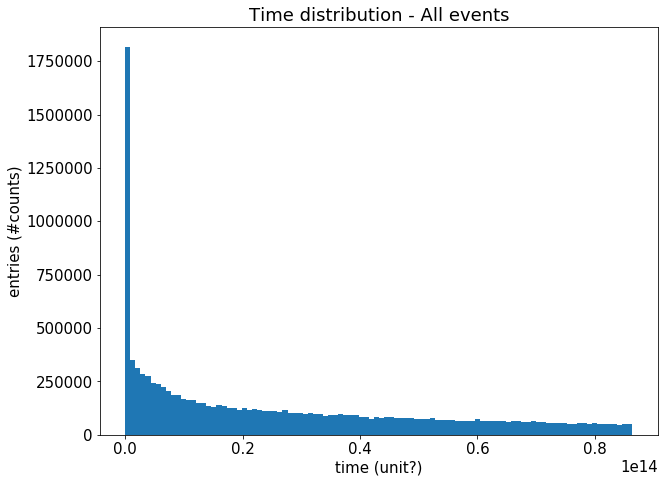

In [7]:
fig, ax = plt.subplots()
ax.hist(df.time, 100)
ax.set_title("Time distribution - All events")
ax.set_xlabel("time (unit?)")
ax.set_ylabel("entries (#counts)")
plt.show()

## Space distribution
### All entries

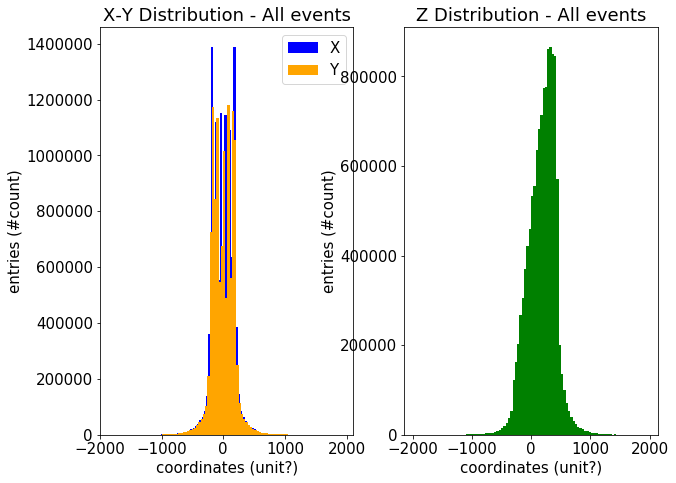

,x,y,z
count,1.193704e+07,1.193704e+07,1.193704e+07
mean,-8.071644e-01,-3.935981e-01,1.832434e+02
std,1.783466e+02,1.772512e+02,2.343580e+02
min,-1.812850e+03,-1.712510e+03,-1.946400e+03
25%,-1.259370e+02,-1.397600e+02,3.146095e+01
50%,-1.618870e+00,-3.889120e-02,2.084190e+02
75%,1.247930e+02,1.383400e+02,3.487020e+02
max,1.846820e+03,1.923000e+03,1.941420e+03


In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
nbins = 100
ax1.hist(df.x, nbins, label='X', color='b')
ax1.hist(df.y, nbins, label='Y', color='orange')
ax2.hist(df.z, nbins, label='Z', color='g')
ax1.set_title("X-Y Distribution - All events")
ax2.set_title("Z Distribution - All events")
ax1.set_xlabel("coordinates (unit?)")
ax2.set_xlabel("coordinates (unit?)")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax1.legend()
plt.show()

pd.DataFrame(df[["x", "y", "z"]].describe())

#### Observations:
- The space distribution ranges in the whole LAr volume (*x, y, z in ~[-1950, +1950]*).
- We can see a greater focus around the origin.


**Questions:** 
1. The sampling x, y, z is *uniform*? Maybe they defined a sensitive area to write only entries around the ROI.

### Only Primary events

In [9]:
primary_xyz = df.sort_values("time").groupby("eventnumber").first()

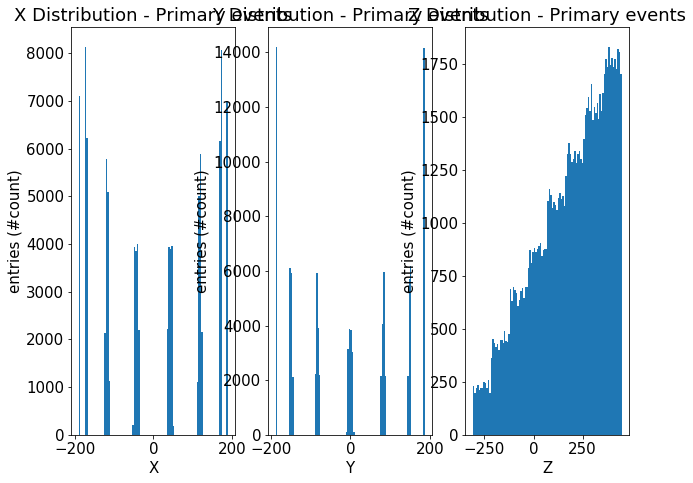

                PID             x             y             z
count  9.929300e+04  99293.000000  99293.000000  99293.000000
mean   1.000902e+09     -0.397268     -0.217171    180.335773
std    0.000000e+00    134.421385    134.336512    189.639518
min    1.000902e+09   -190.099000   -186.999000   -309.998000
25%    1.000902e+09   -121.371000   -146.247000     45.700100
50%    1.000902e+09    -34.977200     -0.006720    211.983000
75%    1.000902e+09    121.356000    146.238000    340.770000
max    1.000902e+09    190.100000    187.004000    449.998000


In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
nbins = 100
ax1.hist(primary_xyz.x, nbins, label='X')
ax2.hist(primary_xyz.y, nbins, label='Y')
ax3.hist(primary_xyz.z, nbins, label='Z')
ax1.set_title("X Distribution - Primary events")
ax2.set_title("Y Distribution - Primary events")
ax3.set_title("Z Distribution - Primary events")
ax1.set_xlabel("X")
ax2.set_xlabel("Y")
ax3.set_xlabel("Z")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax3.set_ylabel("entries (#count)")
plt.show()

print(primary_xyz[["PID", "x", "y", "z"]].describe())

**Observations**
- all the coordinates are sampled in a bounded region around the origin (+/- 200, +/-
- x, y distributions are weird: they seem some sort of discrete sampling.